문제: 타이타닉 생존자 예측 (Titanic Survival Prediction)
1. 데이터 전처리 (Data Preprocessing)
결측치 처리
데이터셋을 로드한 후, 결측치가 있는 열을 확인하고 적절한 방법으로 처리한다.
Age, Cabin, Embarked 열의 결측치를 처리한다.
범주형 데이터 인코딩
범주형 데이터를 머신러닝 모델에서 사용할 수 있도록 수치형으로 변환한다.
Sex, Embarked 열을 수치형으로 변환한다.
데이터 스케일링
수치형 데이터의 분포를 표준화 또는 정규화한다.
2. 탐색적 데이터 분석 (EDA)
기초 통계량 확인
각 열에 대한 기초 통계 정보를 확인하고, 생존자와 비생존자 간의 차이를 분석한다.
시각화
성별, 나이, 승선 클래스(Pclass)와 생존율 간의 관계를 시각화한다.
예를 들어, 성별에 따른 생존율의 막대 그래프, 나이에 따른 생존자 분포 히스토그램, 승선 클래스별 생존율 비교 그래프를 그린다.
3. 모델링 (Modeling)
학습 데이터와 테스트 데이터로 분리
데이터를 학습(train) 데이터와 테스트(test) 데이터로 분리한다. (일반적으로 80% 학습, 20% 테스트 비율)
모델 선택
아래의 분류 모델 중 최소 3개를 선택하여 학습을 진행한다.
로지스틱 회귀 (Logistic Regression)
의사결정나무 (Decision Tree)
랜덤 포레스트 (Random Forest)
서포트 벡터 머신 (SVM)
K-최근접 이웃 (K-Nearest Neighbors)
교차 검증 (Cross Validation)
선택한 모델에 대해 교차 검증을 수행하고, 평균 성능을 확인한다.

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
          survived    pclass       sex        age     sibsp     parch  \
survived                                                                
0              0.0  2.531876  0.852459  30.415100  0.553734  0.329690   
1              1.0  1.950292  0.318713  28.549778  0.473684  0.464912   

               fare  embarked  
survived                       
0         22.117887  1.641166  
1         48.395408  1.368421  


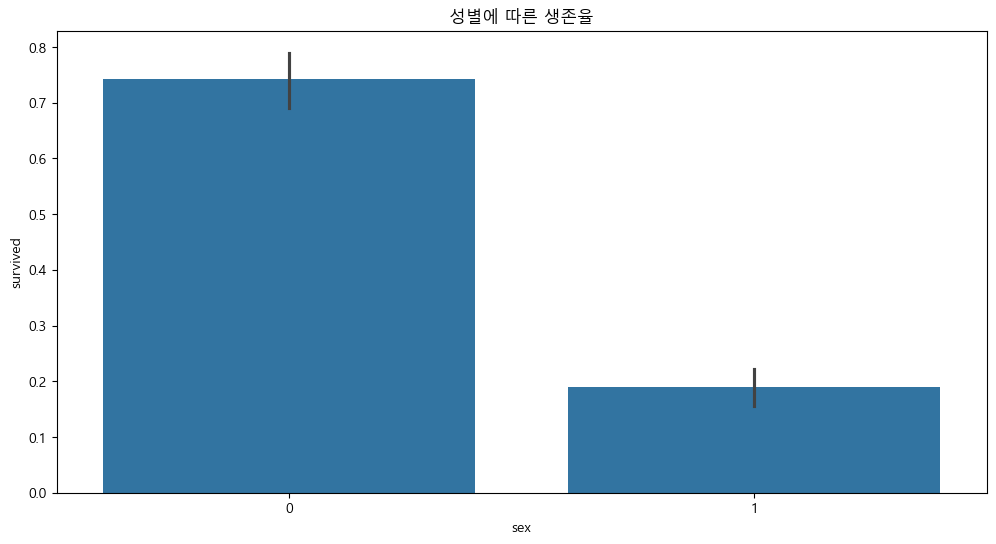

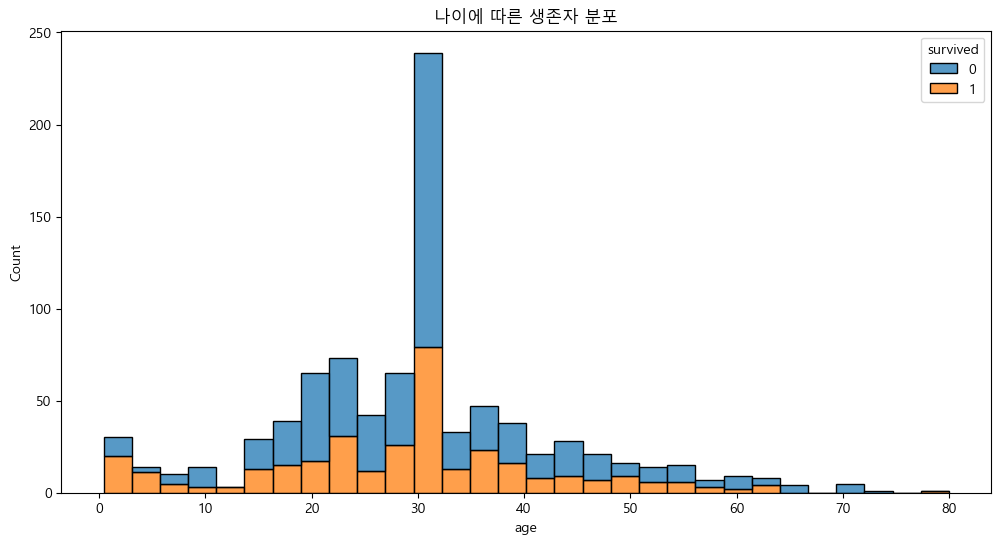

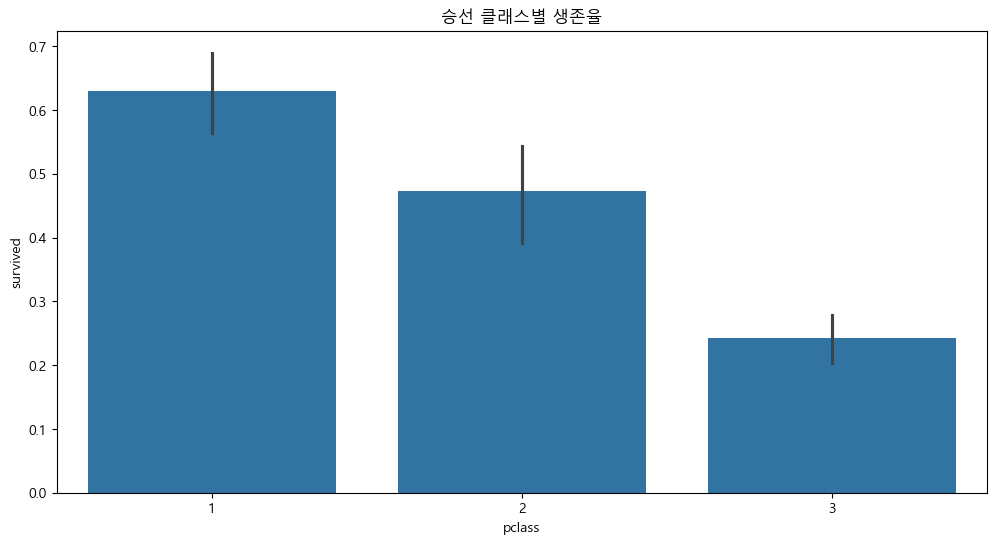

Logistic Regression 평균 교차 검증 정확도: 0.79
Decision Tree 평균 교차 검증 정확도: 0.76
Random Forest 평균 교차 검증 정확도: 0.80
SVM 평균 교차 검증 정확도: 0.82
K-Nearest Neighbors 평균 교차 검증 정확도: 0.80
Random Forest 최종 테스트 정확도: 0.81


In [13]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 나눔고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시

# 데이터 로드
df = sns.load_dataset('titanic')

# 1. 데이터 전처리 (Data Preprocessing)

# 결측치 처리
# 'Age' 열의 결측치는 평균 값으로 대체
df['age'] = df['age'].fillna(df['age'].mean())

# 'Embarked' 열의 결측치는 가장 빈도 높은 값으로 대체
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 'Cabin' 열은 결측치가 많아 제거
df.drop(columns=['deck'], inplace=True)  # 'deck'이 아닌 'cabin'으로 수정

# 범주형 데이터 인코딩
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

# 결측치가 제거된 데이터 확인
print(df.isnull().sum())

# 2. 탐색적 데이터 분석 (EDA)

# 생존자와 비생존자 간 기초 통계량 확인
numeric_cols = df.select_dtypes(include=[np.number]).columns  # 수치형 열 선택
print(df.groupby('survived')[numeric_cols].mean())  # 생존자와 비생존자의 평균값 계산

# 시각화: 성별에 따른 생존율 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='survived', data=df)
plt.title('성별에 따른 생존율')
plt.show()

# 나이에 따른 생존자 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title('나이에 따른 생존자 분포')
plt.show()

# 승선 클래스(Pclass)별 생존율 비교 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('승선 클래스별 생존율')
plt.show()

# 3. 모델링 (Modeling)

# 학습 데이터와 테스트 데이터로 분리
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 선택 및 학습
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 각 모델에 대해 교차 검증 및 성능 평가
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} 평균 교차 검증 정확도: {np.mean(scores):.2f}')

# 선택된 모델을 학습하여 최종 예측
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest 최종 테스트 정확도: {accuracy:.2f}')


In [7]:
import matplotlib.font_manager as fm

# 시스템 폰트 목록 확인
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

C:\Windows\Fonts\seguisb.ttf
C:\Windows\Fonts\BELLB.TTF
C:\Windows\Fonts\BOD_I.TTF
C:\Windows\Fonts\GILB____.TTF
C:\Windows\Fonts\cour.ttf
C:\Windows\Fonts\comicz.ttf
C:\Windows\Fonts\Gabriola.ttf
C:\Windows\Fonts\symbol.ttf
C:\Windows\Fonts\verdanai.ttf
C:\Windows\Fonts\times.ttf
C:\Windows\Fonts\VINERITC.TTF
C:\Windows\Fonts\DUBAI-LIGHT.TTF
C:\Windows\Fonts\STCAIYUN.TTF
C:\Windows\Fonts\SCRIPTBL.TTF
C:\Windows\Fonts\SegoeIcons.ttf
C:\Windows\Fonts\verdana.ttf
C:\Windows\Fonts\GILBI___.TTF
C:\Windows\Fonts\AGENCYB.TTF
C:\Windows\Fonts\corbel.ttf
C:\Windows\Fonts\ZillaSlab-Regular.ttf
C:\Windows\Fonts\monbaiti.ttf
C:\Windows\Fonts\STHUPO.TTF
C:\Windows\Fonts\H2MJSM.TTF
C:\Windows\Fonts\GLSNECB.TTF
C:\Windows\Fonts\Dosis-Regular.ttf
C:\Windows\Fonts\BOOKOSB.TTF
C:\Windows\Fonts\MSUIGHUR.TTF
C:\Windows\Fonts\CENTURY.TTF
C:\Windows\Fonts\FTLTLT.TTF
C:\Windows\Fonts\GOTHICB.TTF
C:\Windows\Fonts\SourceSansPro-Light.ttf
C:\Windows\Fonts\ERASMD.TTF
C:\Windows\Fonts\MOD20.TTF
C:\Windows\Fonts\